In [1]:
import numpy as np
import pandas as pd
import json
import imageio
import wget
import matplotlib.pyplot as plt
import multiprocessing as mp
import os

In [2]:
files =  ["train", "validation", "test"]
base_path  = '/home/nbatanay/.kaggle/competitions/imaterialist-challenge-fashion-2018/'


In [3]:
data = {}
for i in files:
    with open(base_path+i+".json", "r") as file:
        json_file = json.load(file)
        data[i] = json_file

In [4]:
data["train"].keys()

dict_keys(['info', 'license', 'annotations', 'images'])

In [5]:
#number of train, validation and test images 
len(data["train"]["images"]), len(data["validation"]["images"]), len(data["test"]["images"])

(1014544, 9897, 39706)

In [6]:
annotations = np.array([np.array(dict_["labelId"]) for dict_ in data["train"]["annotations"]])

In [7]:
#top 5 annotations
pd.value_counts(np.concatenate(annotations)).head()

66     743250
105    330864
153    261844
17     251869
171    243038
dtype: int64

In [8]:
#how many unique(annotations)
len(np.unique(np.concatenate(annotations)))

228

Text(0.5,0,'Number of annotations')

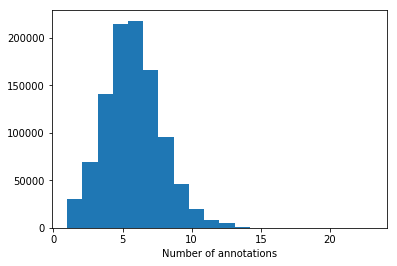

In [9]:
#distribution of the number of annotations per image
num_annot_image = np.array([len(i) for i in annotations])
_ = plt.hist(num_annot_image, bins=20)
plt.xlabel("Number of annotations")

In [10]:
pd.Series(num_annot_image).describe()

count    1.014544e+06
mean     5.836961e+00
std      1.896267e+00
min      1.000000e+00
25%      5.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      2.300000e+01
dtype: float64

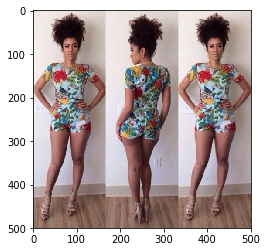

In [11]:
#try to load a sample image from the downloaded dataset
a = imageio.imread("/data/data/nbatanay/kaggle_imaterialist/train/1.jpg") 
plt.imshow(a)

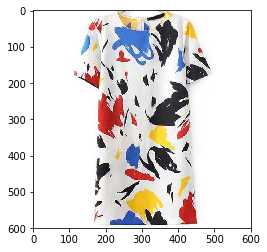

In [14]:
c = imageio.imread("/data/data/nbatanay/kaggle_imaterialist/train/20.jpg") 
plt.imshow(c)

In [15]:
a.shape, b.shape, c.shape

((500, 500, 3), (600, 600, 3), (600, 600, 3))

In [22]:
%%time
#let's get the shapes of the images
train_path = "/data/data/nbatanay/kaggle_imaterialist/train/"
train_images_files = os.listdir(train_path)

def get_shape(x):
    return imageio.imread(x).shape
pool = mp.Pool(processes=20)
train_images_sizes  = pool.map(get_shape, [train_path+i for i in train_images_files])

CPU times: user 2.76 s, sys: 3.36 s, total: 6.13 s
Wall time: 12min 54s


In [23]:
height = np.array(train_images_sizes)[:, 0]
width = np.array(train_images_sizes)[:, 1]
channels = np.array(train_images_sizes)[:, 2]

Text(0.5,0,'channels')

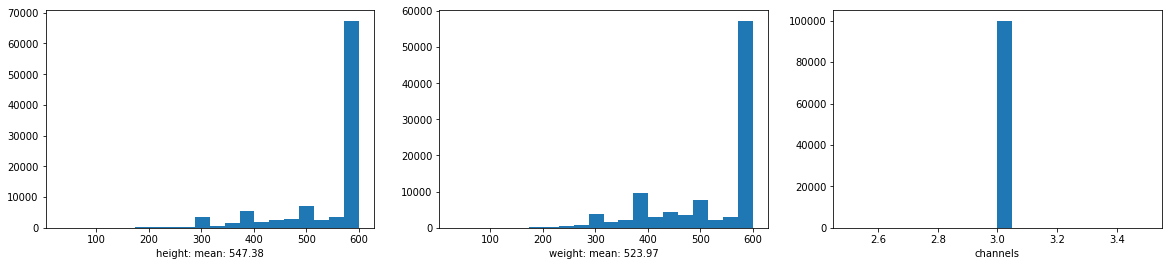

In [25]:
fig, ax=plt.subplots(nrows = 1, ncols=3, figsize=(20, 4))
ax[0].hist(height, bins=20)
ax[0].set_xlabel("height: mean: %.2f"%np.mean(height))
ax[1].hist(width, bins=20)
ax[1].set_xlabel("weight: mean: %.2f"%np.mean(width))
ax[2].hist(channels, bins=20)
ax[2].set_xlabel("channels")

### Notes

1. There 228 unique annotations, each image has anaverage 5 annotations.
2. Images are not of the same shape.

### Resize the images to 600x600x3

In [34]:
import PIL
from PIL import Image

In [65]:
def resize(file):
    new_height, new_width = (600, 600)
    img = Image.open(file)
    img = img.resize((new_height, new_width), PIL.Image.ANTIALIAS)
    
    #pickle the file 
    dirs = file.split("/")
    fname = "/".join(dirs[:-1])+"_new/"+dirs[-1][:-3]+"pkl"
    pd.to_pickle(np.asarray(img), fname)    

In [ ]:
%%time
#Train set
pool = mp.Pool(processes=12)
pool.map(resize, [train_path+i for i in train_images_files])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21 µs


In [ ]:
%%time
#Validation set
valid_path = "/data/data/nbatanay/kaggle_imaterialist/validation/"
valid_images_files = [valid_path+i for i in os.listdir(valid_path)]

pool = mp.Pool(processes=20)
pool.map(resize, valid_images_files)

In [ ]:
%%time
#Test set
test_path = "/data/data/nbatanay/kaggle_imaterialist/test/"
test_images_files = [test_path+i for i in os.listdir(test_path)]

pool = mp.Pool(processes=20)
pool.map(resize, test_images_files)